In [1]:
import numpy as np

In [10]:
z_0_0020 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-0.0020mm.npy')
z_0_0100 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-0.0100mm.npy')
z_0_1000 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-0.1000mm.npy')
z_0_2000 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-0.2000mm.npy')
z_0_4000 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-0.4000mm.npy')
z_0_8000 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-0.8000mm.npy')
z_1_2000 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-1.2000mm.npy')
z_1_6000 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-1.6000mm.npy')
z_2_0000 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-2.0000mm.npy')
z_10_0000 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-10.0000mm.npy')
z_20_0000 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-20.0000mm.npy')
z_40_0000 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-40.0000mm.npy')
z_50_0000 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-50.0000mm.npy')

phases = [z_0_2000, z_0_4000, z_0_8000, z_1_2000, z_1_6000, z_2_0000, z_10_0000, z_20_0000, z_40_0000, z_50_0000]

In [11]:
def find_power(data: np.ndarray, threshold:int=0.01) -> int:
    threshold /= 1000
    power = 0
    counter = 0
    for i in data:
        for j in i:
            if (j - counter) ** 2 > threshold: power += j ** 2
            counter = j
        counter = 0
    return power

powers = {}

for tr in range(5, 100, 5):
    print(
        f'z=0.2000: {find_power(z_0_2000, threshold=tr)}. '
        f'z=0.4000: {find_power(z_0_4000, threshold=tr)}. '
        f'z=0.8000: {find_power(z_0_8000, threshold=tr)}. '
        f'z=1.2000: {find_power(z_1_2000, threshold=tr)}. '
        f'z=2.0000: {find_power(z_2_0000, threshold=tr)}. '
        f'z=10.0000: {find_power(z_10_0000, threshold=tr)}. '
        f'z=20.0000: {find_power(z_20_0000, threshold=tr)}. '
        f'z=40.0000: {find_power(z_40_0000, threshold=tr)}. '
        f'z=50.0000: {find_power(z_50_0000, threshold=tr)}. tr = {tr}.'
    )
    powers[tr/1000] = [
        find_power(z_0_2000, threshold=tr),
        find_power(z_0_4000, threshold=tr),
        find_power(z_0_8000, threshold=tr),
        find_power(z_1_2000, threshold=tr),
        find_power(z_1_6000, threshold=tr),
        find_power(z_2_0000, threshold=tr),
        find_power(z_10_0000, threshold=tr),
        find_power(z_20_0000, threshold=tr),
        find_power(z_40_0000, threshold=tr),
        find_power(z_50_0000, threshold=tr)
    ]

z=0.2000: 251462.1347903671. z=0.4000: 55509.49493433359. z=0.8000: 16369.843196111706. z=1.2000: 11666.291551506843. z=2.0000: 9442.985028515224. z=10.0000: 2631.4534178636454. z=20.0000: 1492.6294531251747. z=40.0000: 218.02437749606935. z=50.0000: 78.44136071872377. tr = 5.
z=0.2000: 191832.18358749046. z=0.4000: 45089.78247603705. z=0.8000: 12402.313651847628. z=1.2000: 8290.070233688615. z=2.0000: 5919.08526436329. z=10.0000: 563.678304080269. z=20.0000: 261.33865769962745. z=40.0000: 30.870845801293854. z=50.0000: 18.71340777916491. tr = 10.
z=0.2000: 168255.26416674597. z=0.4000: 38338.32680495247. z=0.8000: 9885.124416199253. z=1.2000: 6313.315721363099. z=2.0000: 3965.221138849882. z=10.0000: 182.21738991664688. z=20.0000: 65.98876564325106. z=40.0000: 17.325273107766222. z=50.0000: 16.484722945902764. tr = 15.
z=0.2000: 152078.66646265017. z=0.4000: 33092.179898797745. z=0.8000: 8066.735834112093. z=1.2000: 4876.469278128119. z=2.0000: 2717.3016117691486. z=10.0000: 66.652257

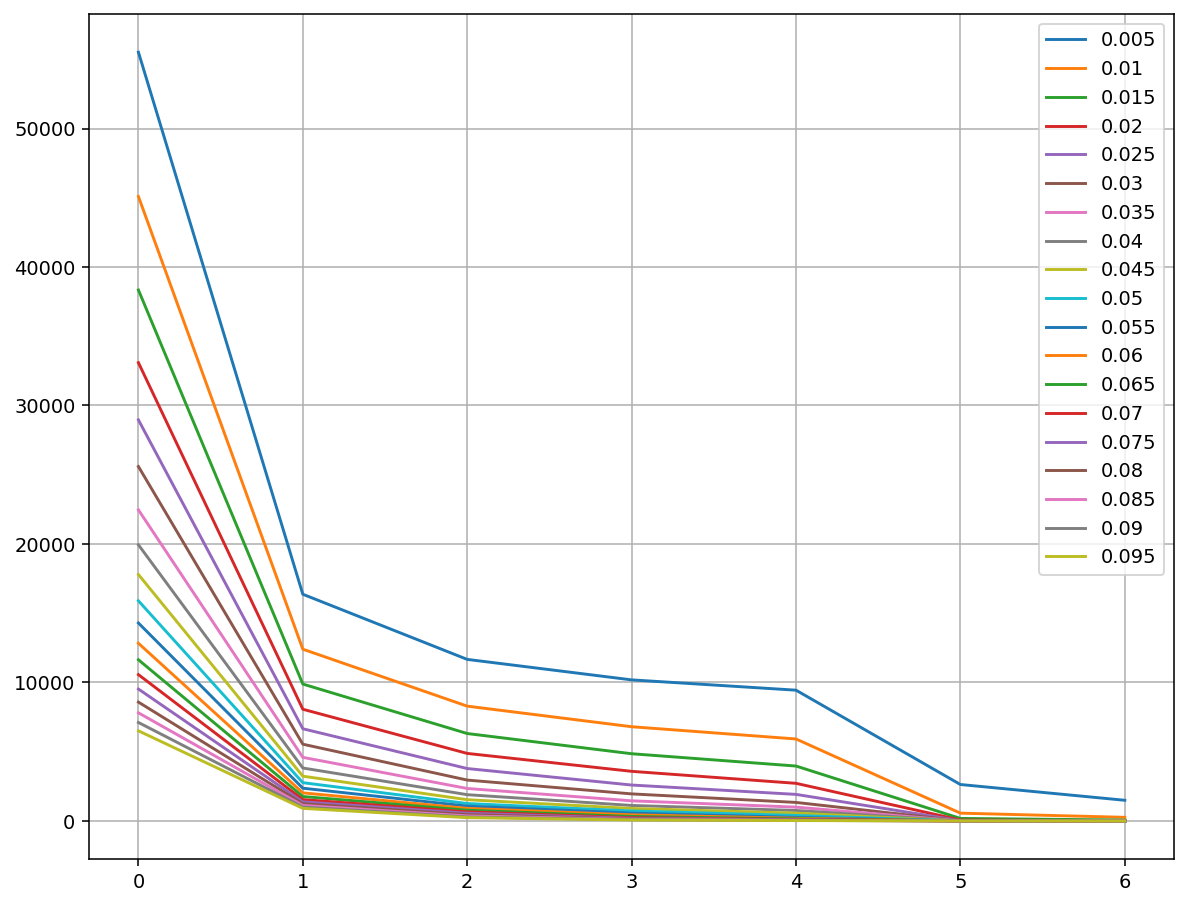

In [15]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=140)
for tr, data in powers.items():
    plt.plot(data[1:8], label=tr)

plt.legend()
plt.grid(True)
plt.show()